In [1]:
%matplotlib inline
import os, pickle, logging, pickle, joblib, sys, warnings
warnings.simplefilter('ignore')
from scipy import stats
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import PyComplexHeatmap as pch

font_path = "/home/zhoujb/local/font/Times New Roman.ttf"
mpl.font_manager.fontManager.addfont(font_path)
prop = mpl.font_manager.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = prop.get_name()
mpl.rcParams['font.sans-serif'] = ["Times New Roman"]
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['pdf.fonttype'] = 42

ONTO_PATH = "/data2/zhoujb/project/cowpea_project/rawData/geneOntology/"
GOKEGG_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/ML/GOKEGG"
FIG_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/plotFigure/"

In [2]:
with open(os.path.join(GOKEGG_PATH, "go_gsea_res.pkl"), "rb") as f:
    go_gsea_res = pickle.load(f)

with open(os.path.join(GOKEGG_PATH, "kegg_gsea_res.pkl"), "rb") as f:
    kegg_gsea_res = pickle.load(f)
    kegg_gsea_res["GO_type"] = "KEGG"

go_kegg_res = pd.concat([go_gsea_res, kegg_gsea_res], axis=0, ignore_index=True)

replace_item = {'oxidoreductase activity, acting on paired donors, with incorporation or reduction of molecular oxygen, NAD(P)H as one donor, and incorporation of one atom of oxygen':'Catalysis of an oxidation-reduction (redox) reaction', 
 'transferase activity, transferring alkyl or aryl (other than methyl) groups':'Catalysis of the transfer of an alkyl or aryl', 
 'xenobiotic detoxification by transmembrane export across the plasma membrane':'xenobiotic detoxification by transmembrane export'}
go_kegg_res = go_kegg_res.replace({"Term":replace_item})

In [12]:
test_list = go_kegg_res[go_kegg_res["traits"]=="PL"]["Term"].to_list()
other_list = go_kegg_res[go_kegg_res["traits"]!="PL"]["Term"].to_list()
set(test_list).difference(other_list)

{'Catalysis of the transfer of an alkyl or aryl',
 'Cul4A-RING E3 ubiquitin ligase complex',
 'Metabolic pathways',
 'acireductone dioxygenase [iron(II)-requiring] activity',
 'exocyst',
 'exocytosis',
 'ferric iron binding',
 'ferrous iron binding',
 'glutamate-gated receptor activity',
 'iron ion transport',
 'phosphatidylinositol-4,5-bisphosphate binding',
 'proteasome binding',
 'protein binding'}

In [13]:
test_list = go_kegg_res[go_kegg_res["traits"]=="GNP"]["Term"].to_list()
other_list = go_kegg_res[go_kegg_res["traits"]!="GNP"]["Term"].to_list()
set(test_list).difference(other_list)

{'4-hydroxyphenylpyruvate dioxygenase activity',
 'Glucosinolate biosynthesis',
 'Pantothenate and CoA biosynthesis',
 'Ser-tRNA(Ala) hydrolase activity',
 'branched-chain amino acid metabolic process',
 'branched-chain-amino-acid transaminase activity',
 'extracellular region',
 'extracellular space'}

In [14]:
test_list = go_kegg_res[go_kegg_res["traits"]=="TSW"]["Term"].to_list()
other_list = go_kegg_res[go_kegg_res["traits"]!="TSW"]["Term"].to_list()
set(test_list).difference(other_list)

{'K63-linked deubiquitinase activity',
 'beta-amyrin synthase activity',
 'glutamine biosynthetic process',
 'glutamine synthetase activity',
 'lipid droplet',
 'metal-dependent deubiquitinase activity',
 'protein K48-linked deubiquitination',
 'protein K63-linked deubiquitination',
 'triterpenoid biosynthetic process'}

In [15]:
test_list = go_kegg_res[go_kegg_res["traits"]=="PSugar"]["Term"].to_list()
other_list = go_kegg_res[go_kegg_res["traits"]!="PSugar"]["Term"].to_list()
set(test_list).difference(other_list)

{'COPII vesicle coat',
 'activation of protein kinase activity',
 'cytoplasm',
 'endoplasmic reticulum exit site',
 'metal ion binding',
 'mitotic spindle assembly',
 'obsolete nitrogen compound metabolic process',
 'plant-type vacuole',
 'preribosome, large subunit precursor',
 'racemase activity, acting on amino acids and derivatives',
 'regulation of mitotic spindle organization',
 'ribosome biogenesis'}

In [16]:
test_list = go_kegg_res[go_kegg_res["traits"]=="PStarch"]["Term"].to_list()
other_list = go_kegg_res[go_kegg_res["traits"]!="PStarch"]["Term"].to_list()
set(test_list).difference(other_list)

{'Catalysis of an oxidation-reduction (redox) reaction',
 'FAD binding',
 'alternative respiration',
 'carotene biosynthetic process',
 'electron transport chain',
 'hormone activity',
 'nitrate import',
 'phosphatidate phosphatase activity',
 'post-translational protein targeting to membrane, translocation',
 'regulation of leaf morphogenesis',
 'regulation of root development',
 'root development',
 'xanthophyll biosynthetic process'}

In [17]:
test_list = go_kegg_res[go_kegg_res["traits"]=="PProtein"]["Term"].to_list()
other_list = go_kegg_res[go_kegg_res["traits"]!="PProtein"]["Term"].to_list()
set(test_list).difference(other_list)

{'auxin catabolic process',
 'dioxygenase activity',
 'double-strand break repair',
 'indole-3-acetaldehyde oxidase activity',
 'jasmonic acid metabolic process',
 'lipase activity',
 'methyl indole-3-acetate esterase activity',
 'methyl jasmonate esterase activity',
 'methyl salicylate esterase activity',
 'salicylic acid metabolic process'}

In [6]:
go_kegg_res["GO_type"].unique()

array(['CC', 'MF', 'BP', 'KEGG'], dtype=object)

In [4]:
row_anno = go_kegg_res[['Term', "GO_type"]].copy()
row_anno = row_anno.set_index("Term")
row_anno = row_anno.rename(columns={"GO_type":"Class"})
row_anno["Class"] = row_anno["Class"].astype("category")
row_anno["Class"] = row_anno["Class"].cat.reorder_categories(['BP', 'CC', 'MF', 'KEGG'], ordered=True)
row_anno = row_anno.sort_values(by=["Class"])
row_anno = row_anno[~row_anno.index.duplicated(keep='first')]

trait_name_list = ['PL', 'GNP', 'TSW',  'PSugar', 'PStarch', 'PProtein']
col_anno = pd.DataFrame(trait_name_list, index=trait_name_list)
col_anno.columns = ["Trait"]


data_long = go_kegg_res.pivot(index="Term", columns="traits", values="Adjusted P-value")
data_long = data_long.reindex(columns=col_anno.index)
data_long = data_long.loc[row_anno.index]
data_long = data_long[~data_long.index.duplicated(keep='first')]
row_anno = row_anno.loc[data_long.index]

annot_df = data_long.applymap(lambda x:'***' if x <= 0.001 else '**' if x <= 0.01 else '*' if x <= 0.05 else "")

data_long = -np.log10(data_long)
data_long = data_long.replace({np.nan:0, -np.inf:0, np.inf:0})

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations
Plotting legends..


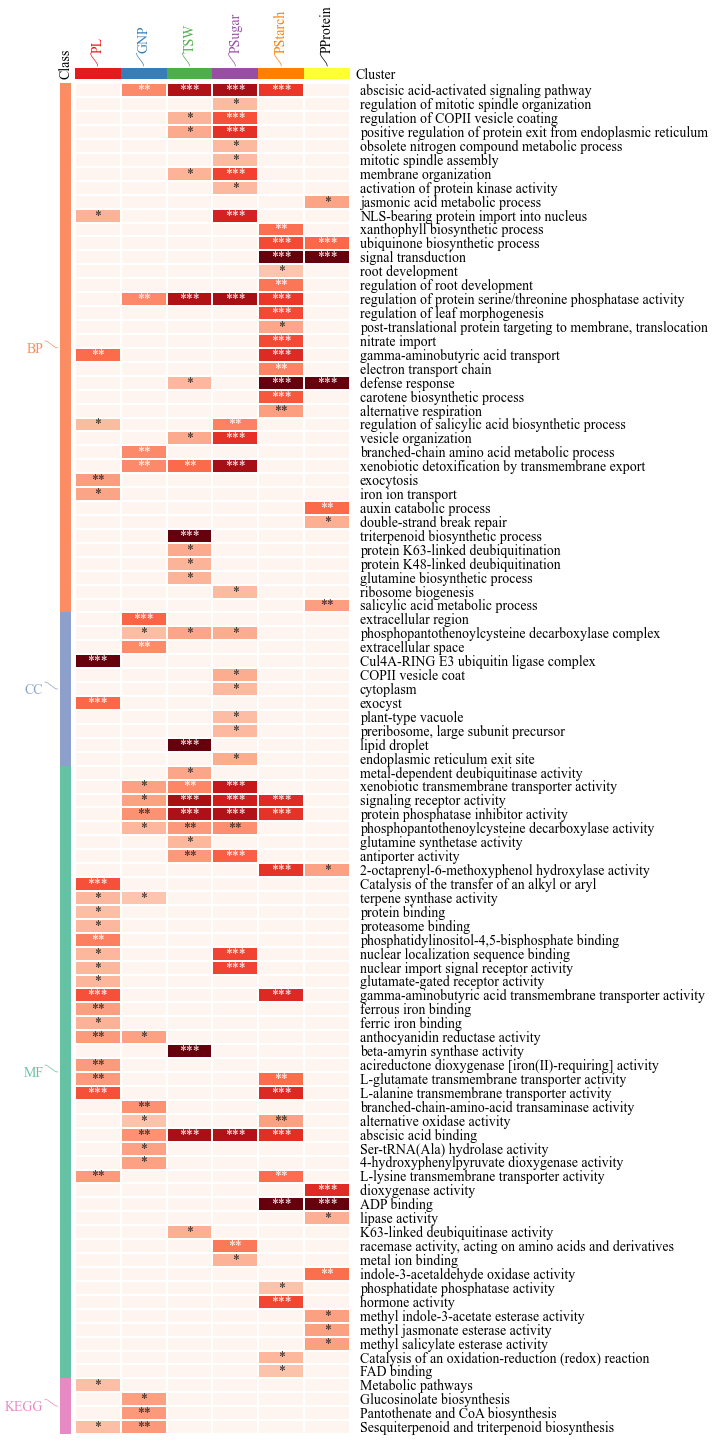

In [10]:
plt.figure(figsize=(4, 18))

mpl.rcParams['font.family'] = prop.get_name()
mpl.rcParams['font.sans-serif'] = ["Times New Roman"]
mpl.rcParams['axes.unicode_minus'] = False

col_ha = pch.HeatmapAnnotation(label=pch.anno_label(col_anno["Trait"], merge=True),
                               Cluster=pch.anno_simple(col_anno["Trait"], add_text=False, legend=False, legend_kws={'frameon':False}, cmap='Set1'), 
                               axis=1)

row_ha = pch.HeatmapAnnotation(label=pch.anno_label(row_anno["Class"], merge=True, cmap='Set2'),
                               Class=pch.anno_simple(row_anno["Class"], add_text=False, legend=False, legend_kws={'frameon':False}, cmap='Set2'), 
                               axis=0)

cm = pch.ClusterMapPlotter(data=data_long, 
                           annot=annot_df,
                           fmt=None,
                           z_score=None,
                           top_annotation=col_ha,
                           left_annotation=row_ha,
                           
                           #annot_kws={'color':'black'},
                           row_cluster=False, col_cluster=False, 
                           row_split_gap=1,
                           linewidths=0.05,linecolor='white',
                           #yticklabels_kws=dict(labelsize=4),
                           legend=False,
                           yticklabels=True,
                           show_rownames=True, show_colnames=False, cmap='Reds', vmax=6, vmin=0, label="")

plt.savefig(os.path.join(FIG_PATH, "GO_KEGG_for_traits.pdf"), format="pdf", bbox_inches='tight', transparent=True)